# Algorithme de descente de gradient

## Optimisation de fonctions

In [25]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def make_grid(xmin=-5,xmax=5,ymin=-5,ymax=5,step=20,data=None):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :return: une matrice 2d contenant les points de la grille, la liste x, la liste y
    """
    if data is not None:
        xmax,xmin,ymax,ymin = np.max(data[:,0]),np.min(data[:,0]),\
                              np.max(data[:,1]),np.min(data[:,1])
    x,y = np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step),
                      np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)




In [26]:
def optimise(fonc,dfonc,xinit, eps,max_iter):
    """ Implémentation de l'algorithme de descente de gradient
    fonc -> la fonction à optimiser.
    dfonc -> le gradient de cette fonction
    xinit -> le point initial
    eps -> Le pas de gradient 
    max_iter -> Le nombre d'itérations.
    return : triplet (x_histo,f_histo,grad_histo) respectivement la liste des points xt, f(xt), gradient(f(xt)) 
    """
    
    
    
    X = [xinit]
    fX = [fonc(xinit)]
    dfX = [dfonc(xinit)]
    for i in range(max_iter):
        xinit = xinit - eps*dfonc(xinit)
        X.append(xinit)
        fX.append(fonc(xinit))
        dfX.append(dfonc(xinit))
    
    return np.array(X),np.array(fX),np.array(dfX)


def xcosx(x):
    return x*np.cos(x)

def dxcosx(x):
    return np.cos(x) - x*np.sin(x)

def logx(x):
    return -np.log(x) + x**2

def dlogx(x):
    return (-1/x) + 2*x

def rosenBrock(x1,x2):
    return 100*(x2-x1**2)**2 +(1 - x1)**2

def drosenBrock(x1,x2):
    
    return -400*x1*(x2-x1**2)-2*(1-x1),200*(x2-x1**2)



## Affichage 2D  

In [27]:
def affiche1(fonc,dfonc,xinit,eps,max_iter):
    """Affiche en fonction du nombre d'itérations les valeurs de fX et du gradient de f."""
    
    absi = [i for i in range(max_iter+1)]
    X,fX,dfX = optimise(fonc,dfonc,xinit,eps,max_iter)
    plt.plot(absi,fX,'r',absi,dfX,'b')
    plt.show()
    #plt.close()


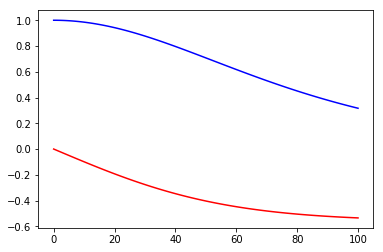

In [28]:
affiche1(xcosx,dxcosx,0,0.01,100)


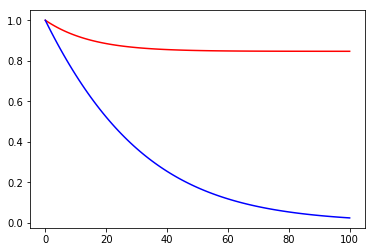

In [29]:
affiche1(logx,dlogx,1,0.01,100)